# Merge/Join Tables (VLOOKUP)

The _merge_ function mimics the functionality of JOIN in SQL queries and replaces the VLOOKUP functionality in Excel. It is one of the most powerful and useful functions for dataframes in Pandas. The main idea is to:
- **join** two (or more) dataframe table using similar keys in each of the tables. 
- **enrich** tables with loopup data  
- **validate** the match values of the key columns in the tables

In [4]:
import pandas as pd

## Loading lookup data

For this example, we will take one of the common lookup data, zip code. The loopup is not trivial as there are a few tousands (more than 33,000 as you can see below) of values and a simple Excel file will struggle to do it efficently and quickly. 

We will start with loading the loopup data from [Simple Maps](https://simplemaps.com/data/us-zips), which I've downloaded to a public S3 bucket.

In [1]:
url = 'https://mlguy-public.s3-eu-west-1.amazonaws.com/excel2pandas/chapter3/simplemaps_uszips_basicv1/uszips.csv'

import requests
from io import StringIO

response = requests.get(url)
response

<Response [200]>

In [91]:
zip_lookup = (
    pd
    .read_csv(StringIO(response.text))
)

zip_lookup

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18004,-66.75218,Adjuntas,PR,Puerto Rico,True,NaN,17242,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36073,-67.17517,Aguada,PR,Puerto Rico,True,NaN,38442,523.5,72003,Aguada,{'72003':100},Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45439,-67.12202,Aguadilla,PR,Puerto Rico,True,NaN,48814,667.9,72005,Aguadilla,{'72005':100},Aguadilla,72005,False,False,America/Puerto_Rico
3,606,18.16724,-66.93828,Maricao,PR,Puerto Rico,True,NaN,6437,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29032,-67.12243,Anasco,PR,Puerto Rico,True,NaN,27073,312.0,72011,AÃ±asco,"{'72003':0.55,'72011':99.45}",AÃ±asco|Aguada,72011|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33092,99923,55.97796,-130.03671,Hyder,AK,Alaska,True,NaN,15,2.1,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33093,99925,55.55767,-132.97627,Klawock,AK,Alaska,True,NaN,927,5.7,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka
33094,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1635,4.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33095,99927,56.25100,-133.37571,Point Baker,AK,Alaska,True,NaN,38,0.2,2198,Prince of Wales-Hyder,{'02198':100},Prince of Wales-Hyder,02198,False,False,America/Sitka


## Lookup Data Exploration

The table above shows us the type of data that we can get from enrichment based on the zip code, including city, state, latitude, longitude, population count and density.  

We can explore the values that we have in this table, before we start to use it for enrichment.

## Counting Values

The simplest aggregation function for each group is the _size_. How many zip codes do we have in each state?

In [32]:
(
    zip_lookup
    .groupby('state_name')
    .size()
)

state_name
Alabama                  642
Alaska                   238
Arizona                  405
Arkansas                 591
California              1761
Colorado                 525
Connecticut              282
Delaware                  67
District of Columbia      52
Florida                  981
Georgia                  735
Hawaii                    94
Idaho                    277
Illinois                1383
Indiana                  775
Iowa                     934
Kansas                   697
Kentucky                 767
Louisiana                515
Maine                    432
Maryland                 468
Massachusetts            537
Michigan                 986
Minnesota                884
Mississippi              423
Missouri                1022
Montana                  361
Nebraska                 581
Nevada                   175
New Hampshire            248
New Jersey               595
New Mexico               368
New York                1794
North Carolina           808
Nor

## Sorting Values

To sort the values is also simple with _sort_value()_ function, and see the population size of each state (based on the zip code lookup data).

In [33]:
us_population_distribution = (
    zip_lookup
    .groupby('state_name')['population']
    .sum()
    .sort_values(ascending=False)
)

us_population_distribution

state_name
California              39140219
Texas                   27884135
Florida                 20594164
New York                19618323
Illinois                12821487
Pennsylvania            12790950
Ohio                    11639989
Georgia                 10297534
North Carolina          10155624
Michigan                 9957465
New Jersey               8881845
Virginia                 8414042
Washington               7280023
Arizona                  6949259
Massachusetts            6830133
Tennessee                6644470
Indiana                  6637220
Missouri                 6090358
Maryland                 6003435
Wisconsin                5777892
Colorado                 5531233
Minnesota                5527473
South Carolina           4955925
Alabama                  4864630
Louisiana                4663243
Kentucky                 4446667
Oregon                   4081732
Oklahoma                 3918473
Connecticut              3581504
Puerto Rico              3384779

## Visualization of the data


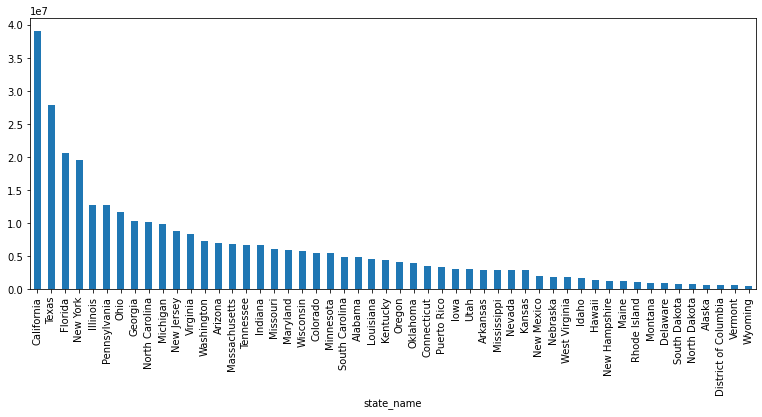

In [34]:
(
    us_population_distribution
    .plot
    .bar(figsize=(13,5))
);

## Loading the main data

We will take the data about brewries in the US that we used in one of the previous lessson, and enrich it with the data from the zip codes table. We will load it from the local file after we retried the data from the API before. 

In [72]:
breweries_data= pd.read_csv('../data/us_breweries.csv')

In [73]:
breweries_data.head()

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at
0,2,Avondale Brewing Co,micro,201 41st St S,NaN,NaN,Birmingham,Alabama,NaN,35222-1932,United States,-86.774322,33.524521,2.057775e+09,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z
1,44,Trim Tab Brewing,micro,2721 5th Ave S,NaN,NaN,Birmingham,Alabama,NaN,35233-3401,United States,-86.791400,33.512849,2.057031e+09,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,NaN,NaN,Huntsville,Alabama,NaN,35805-3046,United States,-86.593201,34.727752,2.569756e+09,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,NaN,NaN,Wasilla,Alaska,NaN,99654-7679,United States,-149.412710,61.575269,NaN,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z
4,76,King Street Brewing Co,micro,9050 King Street,NaN,NaN,Anchorage,Alaska,NaN,99515,United States,-149.879076,61.138489,9.073365e+09,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z


We can see that the postal code is sometimes in the longer format (for example, _35222-1932_) compare to the zip codes that we have in our lookup table (for example, 35222). We will convert them to the shorter format by taking the first 5 characters ([:5]) of the string of the postal_code column.

In [74]:
breweries_data_with_zip = (
    breweries_data
    .assign(zip_code = lambda x : x.postal_code.str[:5])
)

In [75]:
breweries_data_with_zip.head()

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at,zip_code
0,2,Avondale Brewing Co,micro,201 41st St S,NaN,NaN,Birmingham,Alabama,NaN,35222-1932,United States,-86.774322,33.524521,2.057775e+09,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z,35222
1,44,Trim Tab Brewing,micro,2721 5th Ave S,NaN,NaN,Birmingham,Alabama,NaN,35233-3401,United States,-86.791400,33.512849,2.057031e+09,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z,35233
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,NaN,NaN,Huntsville,Alabama,NaN,35805-3046,United States,-86.593201,34.727752,2.569756e+09,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z,35805
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,NaN,NaN,Wasilla,Alaska,NaN,99654-7679,United States,-149.412710,61.575269,NaN,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z,99654
4,76,King Street Brewing Co,micro,9050 King Street,NaN,NaN,Anchorage,Alaska,NaN,99515,United States,-149.879076,61.138489,9.073365e+09,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z,99515


## Joining the tables

The joining of the table is based on a joined key. In this case we want to use the 5-digits zip code as the lookup or join key. In the previous step with shorten the longer zip codes to the shorter 5 digits format, and now we will make sure that the lookup table also have it in the same format. First we need to convert the numeric value into string (_astype(str)_), and then we will pad it with zero is the number is shorter than 5 digits (_zfill(5)_).

In [76]:
zip_lookup_as_string = (
    zip_lookup
    .assign(zip_code = lambda x : x.zip.astype(str).str.zfill(5))
)

The join itself is simple. You start with the table that you want to enrich and using _merge_, you are joining it with the second table. In the example below both tables have a column with the same name (zip_code), and we use it using the _on_ argument. Lastly, we want to have all breweries, even if we don't find the zip code in the lookup table. Therefore, we are using _LEFT_ join using the _how_ argument. 

In [79]:
enriched_breweries_data = (
    breweries_data_with_zip
    .merge(zip_lookup_as_string, on='zip_code', how='left')
)

We have now many more columns as all the columns of both tables are joined to the enriched table. We will ask the Jupyter notebook to show us all the columns by removing the default maximum number of columns to display. 

In the table below we can see all the columns. If the same column name is found in both tables and it wasn't the column that was used for the join or merge, the column of first ("left") table will be appended with x (city_x, for example), and the column of the second ("right") table will be appended with y (city_y, for example).

In [81]:
pd.set_option('display.max_columns', None)
enriched_breweries_data

,id,name,brewery_type,street,address_2,address_3,city_x,state,county_province,postal_code,country,longitude,latitude,phone,website_url,updated_at,created_at,zip_code,zip,lat,lng,city_y,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,2,Avondale Brewing Co,micro,201 41st St S,NaN,NaN,Birmingham,Alabama,NaN,35222-1932,United States,-86.774322,33.524521,2.057775e+09,http://www.avondalebrewing.com,2018-08-23T23:19:57.825Z,2018-07-24T01:32:47.255Z,35222,35222.0,33.52409,-86.77025,Birmingham,AL,Alabama,True,NaN,9033.0,815.8,1073.0,Jefferson,{'01073':100},Jefferson,01073,False,False,America/Chicago
1,44,Trim Tab Brewing,micro,2721 5th Ave S,NaN,NaN,Birmingham,Alabama,NaN,35233-3401,United States,-86.791400,33.512849,2.057031e+09,http://www.trimtabbrewing.com,2018-08-23T23:20:31.423Z,2018-07-24T01:32:47.815Z,35233,35233.0,33.50876,-86.80194,Birmingham,AL,Alabama,True,NaN,1715.0,300.7,1073.0,Jefferson,{'01073':100},Jefferson,01073,False,False,America/Chicago
2,46,Yellowhammer Brewery,micro,2600 Clinton Ave W,NaN,NaN,Huntsville,Alabama,NaN,35805-3046,United States,-86.593201,34.727752,2.569756e+09,http://www.yellowhammerbrewery.com,2018-08-23T23:20:33.102Z,2018-07-24T01:32:47.838Z,35805,35805.0,34.70858,-86.62125,Huntsville,AL,Alabama,True,NaN,21200.0,949.7,1089.0,Madison,{'01089':100},Madison,01089,False,False,America/Chicago
3,55,Bearpaw River Brewing Co,micro,4605 E Palmer Wasilla Hwy,NaN,NaN,Wasilla,Alaska,NaN,99654-7679,United States,-149.412710,61.575269,NaN,http://bearpawriverbrewing.com,2018-08-23T23:20:40.743Z,2018-07-24T01:32:47.967Z,99654,99654.0,61.45483,-149.90045,Wasilla,AK,Alaska,True,NaN,62135.0,40.4,2170.0,Matanuska-Susitna,{'02170':100},Matanuska-Susitna,02170,False,False,America/Anchorage
4,76,King Street Brewing Co,micro,9050 King Street,NaN,NaN,Anchorage,Alaska,NaN,99515,United States,-149.879076,61.138489,9.073365e+09,http://www.kingstreetbrewing.com,2018-08-23T23:20:57.179Z,2018-07-24T01:32:48.301Z,99515,99515.0,61.11739,-149.88889,Anchorage,AK,Alaska,True,NaN,23402.0,818.8,2020.0,Anchorage,{'02020':100},Anchorage,02020,False,False,America/Anchorage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,195,Sonoran Brewing,contract,3002 E Washington St,NaN,NaN,Phoenix,Arizona,NaN,85034-1518,United States,-111.980574,33.447533,6.025109e+09,http://www.sonoranbrewing.com,2018-08-23T23:22:39.673Z,2018-07-24T01:32:49.957Z,85034,85034.0,33.43489,-112.02005,Phoenix,AZ,Arizona,True,NaN,4772.0,188.7,4013.0,Maricopa,{'04013':100},Maricopa,04013,False,False,America/Phoenix
946,196,State 48 Barrel and Lager House,planning,NaN,NaN,NaN,Scottsdale,Arizona,NaN,85260-1924,United States,-111.899237,33.509121,NaN,NaN,2018-08-23T23:22:40.070Z,2018-07-24T01:32:49.969Z,85260,85260.0,33.60958,-111.89157,Scottsdale,AZ,Arizona,True,NaN,38934.0,959.4,4013.0,Maricopa,{'04013':100},Maricopa,04013,False,False,America/Phoenix
947,197,State 48 Brewery,planning,NaN,NaN,NaN,Phoenix,Arizona,NaN,85003-1626,United States,-112.077346,33.448587,NaN,NaN,2018-08-23T23:22:40.558Z,2018-07-24T01:32:49.981Z,85003,85003.0,33.45076,-112.07836,Phoenix,AZ,Arizona,True,NaN,8419.0,1953.9,4013.0,Maricopa,{'04013':100},Maricopa,04013,False,False,America/Phoenix
948,199,Sun Up Brewing Co.,brewpub,322 E Camelback Rd,NaN,NaN,Phoenix,Arizona,NaN,85012-1614,United States,-112.068777,33.509509,6.026709e+09,http://sunup.beer,2018-08-23T23:22:42.395Z,2018-07-24T01:32:50.036Z,85012,85012.0,33.50731,-112.07035,Phoenix,AZ,Arizona,True,NaN,7012.0,1124.4,4013.0,Maricopa,{'04013':100},Maricopa,04013,False,False,America/Phoenix


Now, that we have the enriched table, we can analyze the joined data and explore the different counties across the US, count their number of breweries, and check statistics about their population. It can help us decide where we should travel too, or where we should open the next brewry. 

In [93]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .sort_values(by='population_sum', ascending=False)
)

,state,brewry_count,population_sum,density_average
county_name,,,,
Maricopa,AZ,54,2245381.0,1384.942593
Pima,AZ,17,710693.0,1314.441176
San Diego,CA,16,618653.0,1358.225000
Coconino,AZ,11,404415.0,15.054545
Cook,IL,7,352586.0,3234.442857
...,...,...,...,...
Humboldt,CA,1,772.0,12.400000
Chemung,NY,1,749.0,21.000000
Runnels,TX,1,522.0,2.400000


We can see that _Maricopa_ is the beer county with 54 different brewries in it. It is also interesting to see _Coconino_ County with a large number of brewries and suprisigly sparse population around the breweries in it. If you check, you can see that this is the county with most of the grand canyon, which explain its sparse population, and also a good opportunity to open your brewry business there. 

Let's change the sort key to find the counties with the most breweries

In [95]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .sort_values(by='brewry_count', ascending=False)
)

,state,brewry_count,population_sum,density_average
county_name,,,,
Maricopa,AZ,54,2245381.0,1384.942593
Pima,AZ,17,710693.0,1314.441176
San Diego,CA,16,618653.0,1358.225000
Jefferson,AL,16,263840.0,652.262500
Anchorage,AK,13,266823.0,764.615385
...,...,...,...,...
Monmouth,NJ,1,23861.0,989.100000
Morgan,AL,1,32666.0,472.300000
Morton,ND,1,25735.0,14.400000


We can now ask ourselves where do we have the most brewries per population and add this column to our table

In [99]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .assign(brewry_per_population = lambda x : x.brewry_count / x.population_sum * 1000)
    .sort_values(by='brewry_per_population', ascending=False)
)

,state,brewry_count,population_sum,density_average,brewry_per_population
county_name,,,,,
Alamance,NC,1,41.0,819.9,24.390244
San Juan,CO,1,516.0,0.8,1.937984
Runnels,TX,1,522.0,2.4,1.915709
Chemung,NY,1,749.0,21.0,1.335113
Humboldt,CA,1,772.0,12.4,1.295337
...,...,...,...,...,...
Johnson,KS,1,63884.0,335.9,0.015653
Riverside,CA,1,64116.0,219.1,0.015597
Bronx,NY,1,73870.0,10404.0,0.013537


We can see, as it is often the case, that we have on the top and the bottom of the table counties with very few brewries. The top of the table of brewries per 1000 people is held by Alamance that was last on our previous table of counties by population. To avoid this, we can filter (using _query_) our table to counties that have more than 1 or 2 brewries.

In [105]:
(
    enriched_breweries_data
    .groupby('county_name')
    .agg(
        state=('state_id', 'min'), 
        brewry_count=('id', 'count'),
        population_sum=('population', 'sum'),
        density_average=('density', 'mean')
        )
    .assign(brewry_per_population = lambda x : x.brewry_count / x.population_sum * 1000)
    .query("brewry_count > 2")
    .sort_values(by='brewry_per_population', ascending=False)
)

,state,brewry_count,population_sum,density_average,brewry_per_population
county_name,,,,,
Mobile,AL,4,21696.0,611.425000,0.184366
Berrien,MI,3,21825.0,146.633333,0.137457
Erie,NY,4,35339.0,1016.825000,0.113189
Kenai Peninsula,AK,7,74328.0,10.228571,0.094177
Pulaski,AR,4,42533.0,487.950000,0.094045
...,...,...,...,...,...
Yakima,WA,3,125184.0,1353.366667,0.023965
Pima,AZ,17,710693.0,1314.441176,0.023920
LaPorte,IN,3,131052.0,217.800000,0.022892


And the winner is Mobile county in Alabama, with 4 brewries and a 0.18 brewry for every 1,000 people